In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔍 Heart Disease PCA Analysis Started!")
print("="*60)

🔍 Heart Disease PCA Analysis Started!


# ===============================
# 1. LOAD PREPROCESSED DATA
# ===============================

In [4]:
X_scaled = pd.read_csv('../Data/X_preprocessed.csv')
y = pd.read_csv('../Data/y_target.csv').squeeze()
scaler = joblib.load('../Models/scaler.pkl')
    
print(f" Loaded preprocessed features: {X_scaled.shape}")
print(f" Loaded target variable: {y.shape}")
print(f" Features: {list(X_scaled.columns)}")
print(f" Target distribution: {y.value_counts().to_dict()}")

 Loaded preprocessed features: (303, 13)
 Loaded target variable: (303,)
 Features: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
 Target distribution: {0: 164, 1: 139}


# ===============================
# 2. INITIAL PCA ANALYSIS
# ===============================

In [5]:
# Apply PCA with all components to analyze variance
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

print(f" Number of original features: {X_scaled.shape[1]}")
print(f" Number of principal components: {len(pca_full.explained_variance_ratio_)}")
print(f" Total explained variance: {pca_full.explained_variance_ratio_.sum():.4f}")

# Display explained variance for each component
variance_df = pd.DataFrame({
    'Component': range(1, len(pca_full.explained_variance_ratio_) + 1),
    'Explained_Variance_Ratio': pca_full.explained_variance_ratio_,
    'Cumulative_Variance': np.cumsum(pca_full.explained_variance_ratio_)
})

print("\n Explained Variance by Component:")
print(variance_df.round(4))

 Number of original features: 13
 Number of principal components: 13
 Total explained variance: 1.0000

 Explained Variance by Component:
    Component  Explained_Variance_Ratio  Cumulative_Variance
0           1                    0.2369               0.2369
1           2                    0.1231               0.3599
2           3                    0.0953               0.4553
3           4                    0.0843               0.5396
4           5                    0.0758               0.6154
5           6                    0.0679               0.6834
6           7                    0.0665               0.7499
7           8                    0.0598               0.8097
8           9                    0.0529               0.8626
9          10                    0.0433               0.9059
10         11                    0.0353               0.9412
11         12                    0.0316               0.9728
12         13                    0.0272               1.0000


# ===============================
# 3. DETERMINE OPTIMAL COMPONENTS
# ===============================

In [6]:
# Calculate cumulative variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find components for different variance thresholds
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
optimal_components = {}

for threshold in thresholds:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    optimal_components[f"{threshold*100:.0f}%"] = n_components
    print(f" Components for {threshold*100:.0f}% variance: {n_components}")

# Choose optimal components (90% variance as default)
n_components_optimal = optimal_components["90%"]
print(f"\n Selected optimal components: {n_components_optimal} (for 90% variance)")


 Components for 80% variance: 8
 Components for 85% variance: 9
 Components for 90% variance: 10
 Components for 95% variance: 12
 Components for 99% variance: 13

 Selected optimal components: 10 (for 90% variance)


# ===============================
# 4. VISUALIZE PCA RESULTS
# ===============================

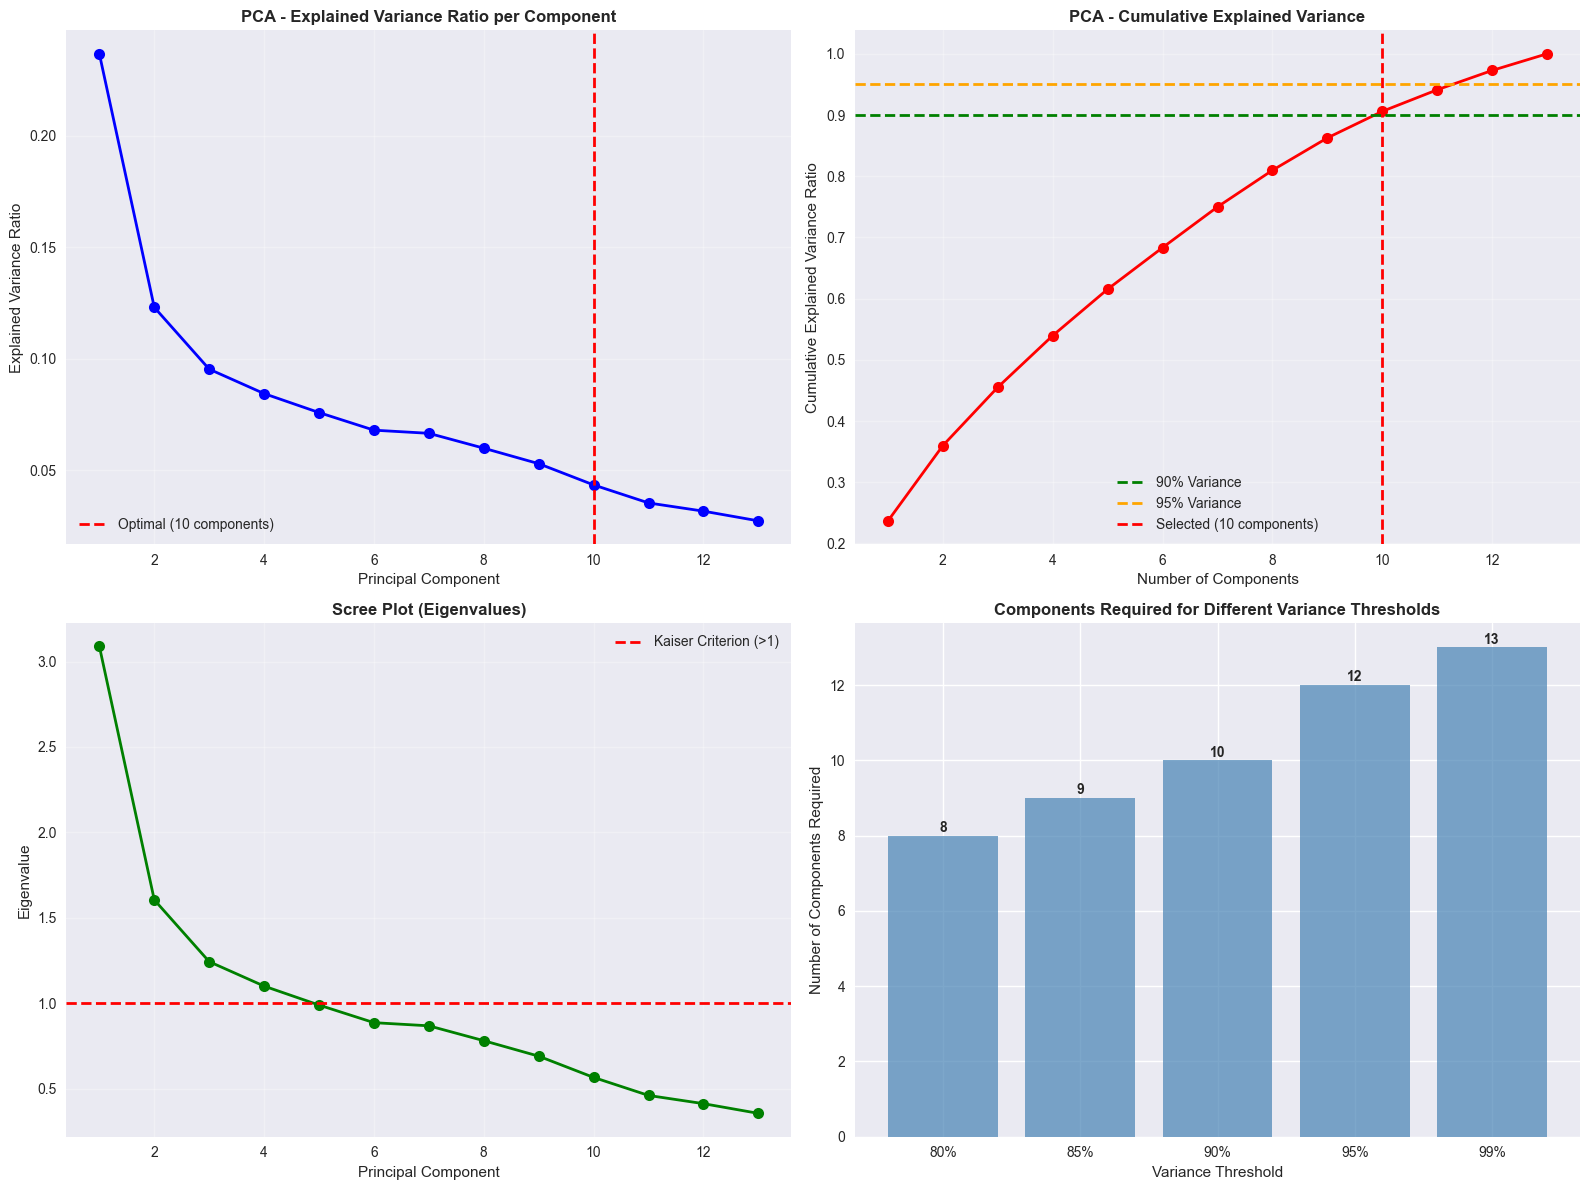

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Explained Variance Ratio per Component
axes[0,0].plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
               pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
axes[0,0].set_title('PCA - Explained Variance Ratio per Component', fontweight='bold')
axes[0,0].set_xlabel('Principal Component')
axes[0,0].set_ylabel('Explained Variance Ratio')
axes[0,0].grid(True, alpha=0.3)

# Highlight optimal components
axes[0,0].axvline(x=n_components_optimal, color='red', linestyle='--', 
                  linewidth=2, label=f'Optimal ({n_components_optimal} components)')
axes[0,0].legend()

# 2. Cumulative Explained Variance
axes[0,1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
               'ro-', linewidth=2, markersize=8)
axes[0,1].axhline(y=0.90, color='green', linestyle='--', linewidth=2, label='90% Variance')
axes[0,1].axhline(y=0.95, color='orange', linestyle='--', linewidth=2, label='95% Variance')
axes[0,1].axvline(x=n_components_optimal, color='red', linestyle='--', 
                  linewidth=2, label=f'Selected ({n_components_optimal} components)')
axes[0,1].set_title('PCA - Cumulative Explained Variance', fontweight='bold')
axes[0,1].set_xlabel('Number of Components')
axes[0,1].set_ylabel('Cumulative Explained Variance Ratio')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Scree Plot (Eigenvalues)
eigenvalues = pca_full.explained_variance_
axes[1,0].plot(range(1, len(eigenvalues) + 1), eigenvalues, 'go-', 
               linewidth=2, markersize=8)
axes[1,0].set_title('Scree Plot (Eigenvalues)', fontweight='bold')
axes[1,0].set_xlabel('Principal Component')
axes[1,0].set_ylabel('Eigenvalue')
axes[1,0].axhline(y=1, color='red', linestyle='--', linewidth=2, label='Kaiser Criterion (>1)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Components vs Variance Threshold
threshold_components = list(optimal_components.values())
threshold_labels = list(optimal_components.keys())
axes[1,1].bar(threshold_labels, threshold_components, color='steelblue', alpha=0.7)
axes[1,1].set_title('Components Required for Different Variance Thresholds', fontweight='bold')
axes[1,1].set_xlabel('Variance Threshold')
axes[1,1].set_ylabel('Number of Components Required')
for i, v in enumerate(threshold_components):
    axes[1,1].text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ===============================
# 5. APPLY OPTIMAL PCA
# ===============================

In [8]:
# Apply PCA with optimal number of components
pca_optimal = PCA(n_components=n_components_optimal)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

print(f" Applied PCA with {n_components_optimal} components")
print(f" Original feature shape: {X_scaled.shape}")
print(f" PCA-transformed shape: {X_pca_optimal.shape}")
print(f" Variance explained: {pca_optimal.explained_variance_ratio_.sum():.4f}")
print(f" Variance retained: {pca_optimal.explained_variance_ratio_.sum()*100:.2f}%")

# Create DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(n_components_optimal)]
X_pca_df = pd.DataFrame(X_pca_optimal, columns=pca_columns, index=X_scaled.index)

print(f" PCA component names: {pca_columns}")


 Applied PCA with 10 components
 Original feature shape: (303, 13)
 PCA-transformed shape: (303, 10)
 Variance explained: 0.9059
 Variance retained: 90.59%
 PCA component names: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


# ===============================
# 6. PCA COMPONENT ANALYSIS
# ===============================

In [9]:
# Analyze component loadings (feature importance in each PC)
feature_names = X_scaled.columns
components_df = pd.DataFrame(
    pca_optimal.components_.T,
    columns=pca_columns,
    index=feature_names
)

print(" Component Loadings (Top features for each PC):")
for i, pc in enumerate(pca_columns):
    print(f"\n🔹 {pc} (Variance: {pca_optimal.explained_variance_ratio_[i]:.4f}):")
    top_features = components_df[pc].abs().sort_values(ascending=False).head(3)
    for feature, loading in top_features.items():
        print(f"   • {feature}: {loading:.4f}")


 Component Loadings (Top features for each PC):

🔹 PC1 (Variance: 0.2369):
   • oldpeak: 0.3970
   • thalach: 0.3894
   • slope: 0.3541

🔹 PC2 (Variance: 0.1231):
   • sex: 0.4522
   • chol: 0.4385
   • age: 0.4181

🔹 PC3 (Variance: 0.0953):
   • fbs: 0.5226
   • sex: 0.4627
   • cp: 0.4136

🔹 PC4 (Variance: 0.0843):
   • slope: 0.5817
   • oldpeak: 0.4106
   • ca: 0.3910

🔹 PC5 (Variance: 0.0758):
   • restecg: 0.6502
   • chol: 0.3963
   • age: 0.3705

🔹 PC6 (Variance: 0.0679):
   • fbs: 0.5861
   • exang: 0.4392
   • ca: 0.3755

🔹 PC7 (Variance: 0.0665):
   • restecg: 0.5817
   • trestbps: 0.4287
   • chol: 0.3851

🔹 PC8 (Variance: 0.0598):
   • trestbps: 0.4504
   • chol: 0.4064
   • fbs: 0.3493

🔹 PC9 (Variance: 0.0529):
   • cp: 0.4411
   • chol: 0.4112
   • ca: 0.3830

🔹 PC10 (Variance: 0.0433):
   • exang: 0.6466
   • cp: 0.4404
   • thal: 0.4147


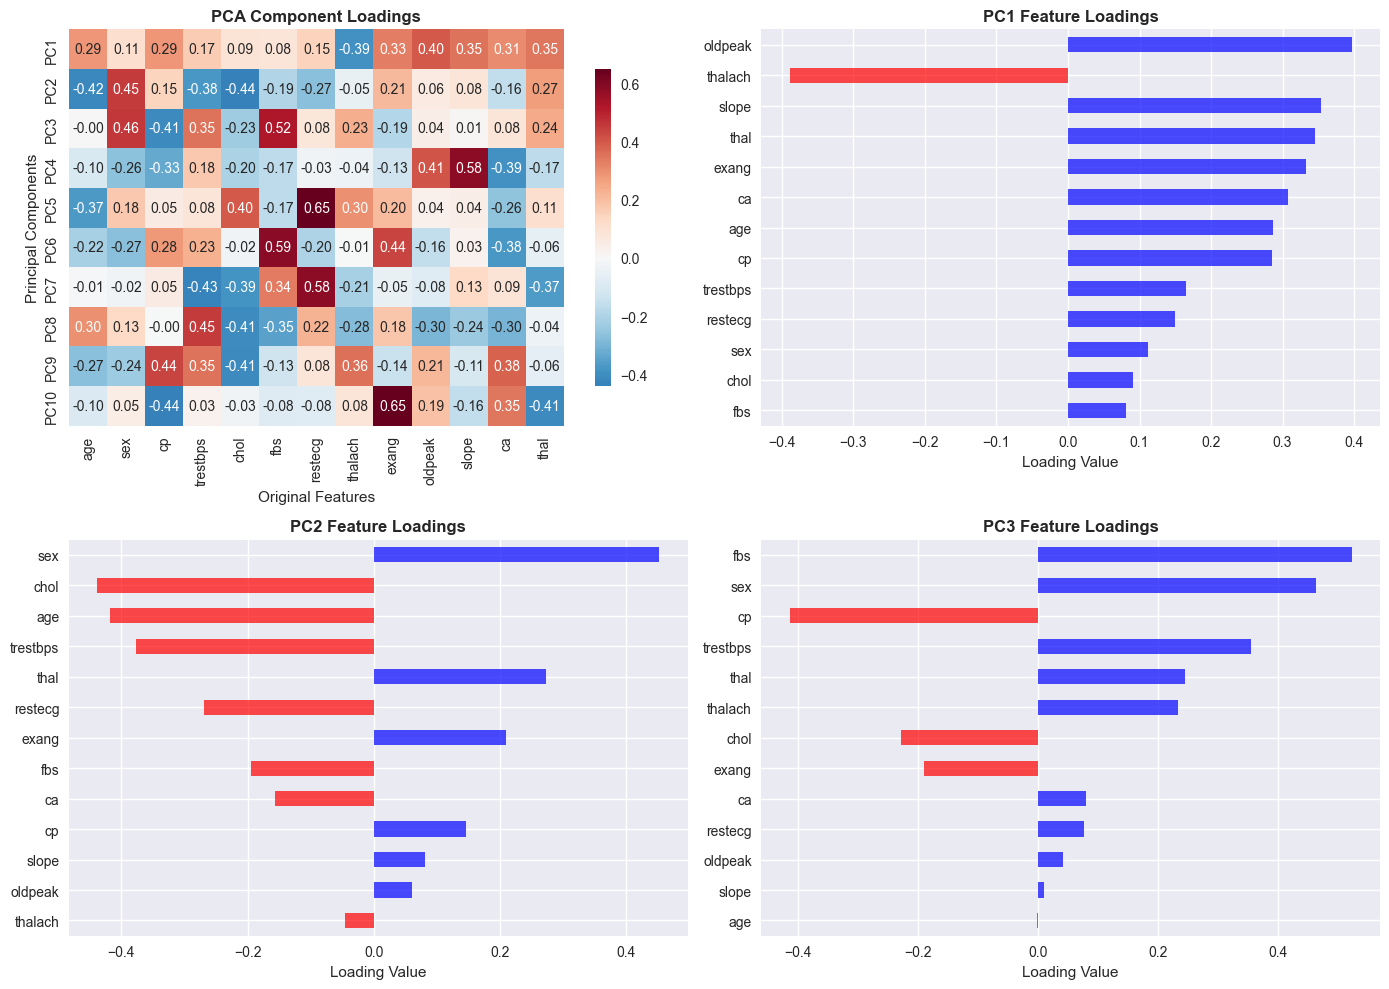

In [10]:
# Visualize component loadings
plt.figure(figsize=(14, 10))

# Heatmap of component loadings
plt.subplot(2, 2, 1)
sns.heatmap(components_df.T, cmap='RdBu_r', center=0, 
            annot=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('PCA Component Loadings', fontweight='bold')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')

# Top loadings for first few components
for i in range(min(3, n_components_optimal)):
    plt.subplot(2, 2, i+2)
    loadings = components_df.iloc[:, i].sort_values(key=abs, ascending=True)
    colors = ['red' if x < 0 else 'blue' for x in loadings]
    loadings.plot(kind='barh', color=colors, alpha=0.7)
    plt.title(f'{pca_columns[i]} Feature Loadings', fontweight='bold')
    plt.xlabel('Loading Value')

plt.tight_layout()
plt.show()

# ===============================
# 7. VISUALIZE TRANSFORMED DATA
# ===============================

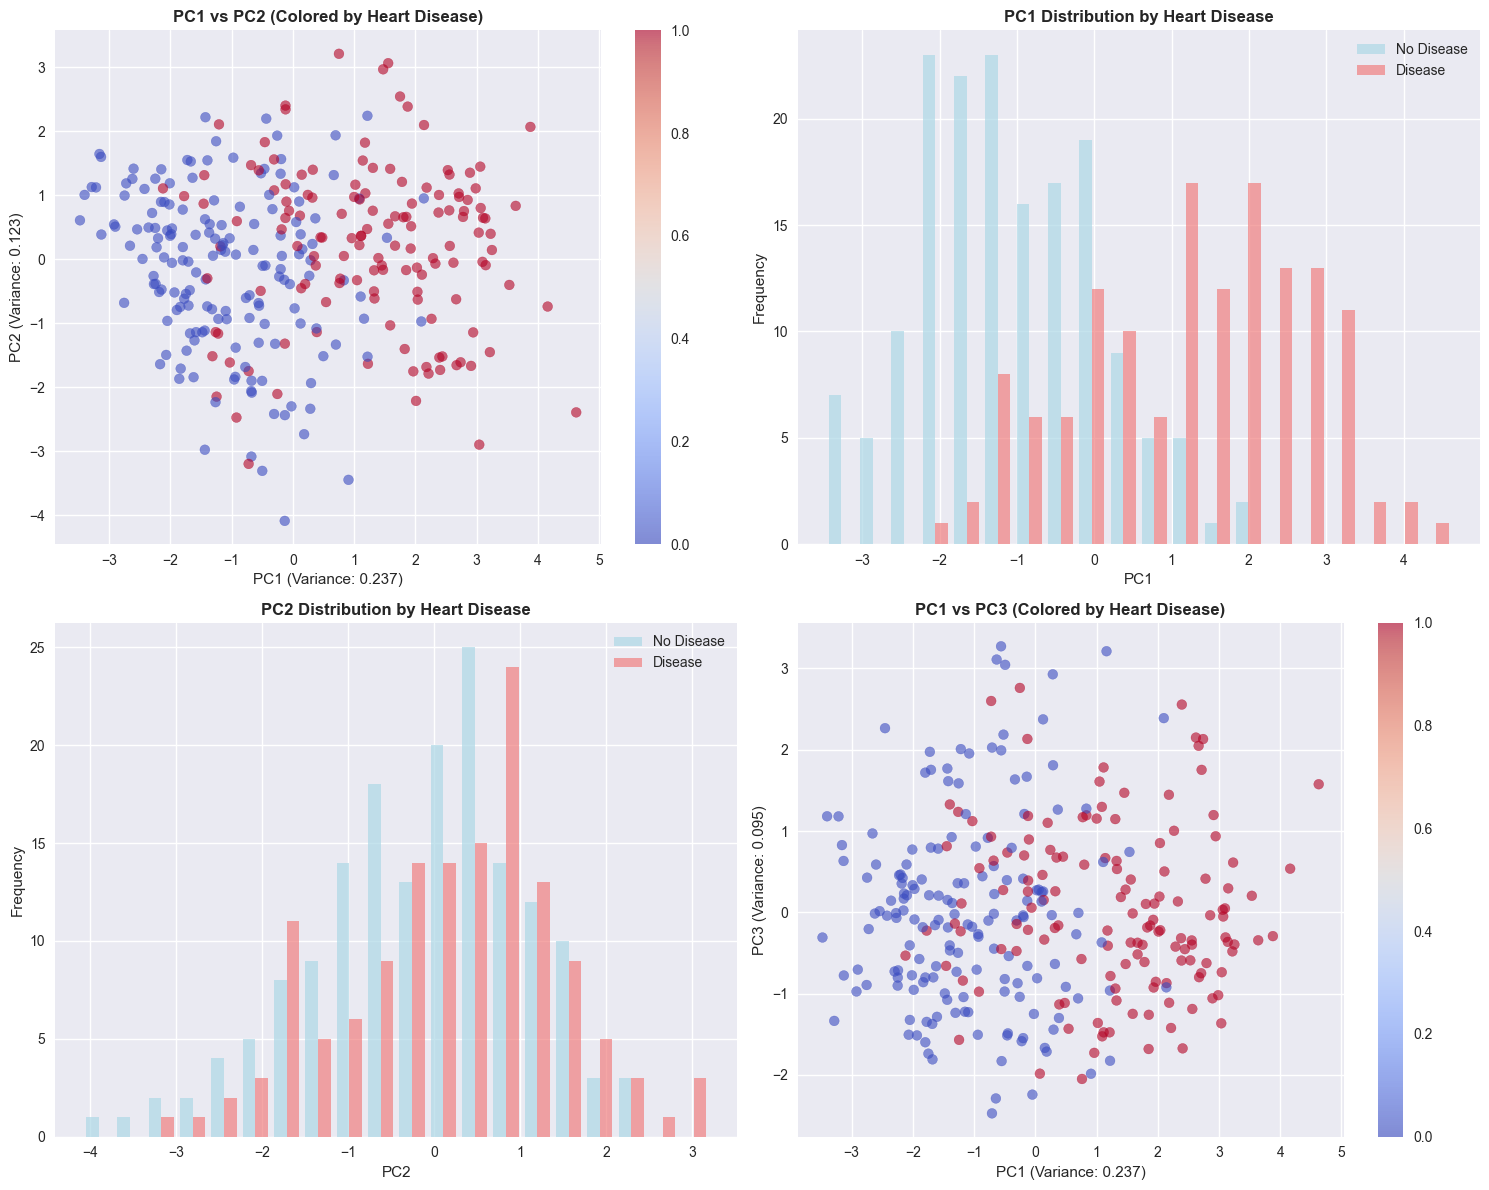

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# PC1 vs PC2 colored by target
scatter = axes[0,0].scatter(X_pca_df['PC1'], X_pca_df['PC2'], c=y, 
                           cmap='coolwarm', alpha=0.6, s=50)
axes[0,0].set_title('PC1 vs PC2 (Colored by Heart Disease)', fontweight='bold')
axes[0,0].set_xlabel(f'PC1 (Variance: {pca_optimal.explained_variance_ratio_[0]:.3f})')
axes[0,0].set_ylabel(f'PC2 (Variance: {pca_optimal.explained_variance_ratio_[1]:.3f})')
plt.colorbar(scatter, ax=axes[0,0])

# PC1 distribution by target
no_disease_pc1 = X_pca_df[y == 0]['PC1']
disease_pc1 = X_pca_df[y == 1]['PC1']
axes[0,1].hist([no_disease_pc1, disease_pc1], bins=20, alpha=0.7, 
              label=['No Disease', 'Disease'], color=['lightblue', 'lightcoral'])
axes[0,1].set_title('PC1 Distribution by Heart Disease', fontweight='bold')
axes[0,1].set_xlabel('PC1')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# PC2 distribution by target
no_disease_pc2 = X_pca_df[y == 0]['PC2']
disease_pc2 = X_pca_df[y == 1]['PC2']
axes[1,0].hist([no_disease_pc2, disease_pc2], bins=20, alpha=0.7, 
              label=['No Disease', 'Disease'], color=['lightblue', 'lightcoral'])
axes[1,0].set_title('PC2 Distribution by Heart Disease', fontweight='bold')
axes[1,0].set_xlabel('PC2')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# If we have PC3, show PC1 vs PC3
if n_components_optimal >= 3:
    scatter3 = axes[1,1].scatter(X_pca_df['PC1'], X_pca_df['PC3'], c=y, 
                                cmap='coolwarm', alpha=0.6, s=50)
    axes[1,1].set_title('PC1 vs PC3 (Colored by Heart Disease)', fontweight='bold')
    axes[1,1].set_xlabel(f'PC1 (Variance: {pca_optimal.explained_variance_ratio_[0]:.3f})')
    axes[1,1].set_ylabel(f'PC3 (Variance: {pca_optimal.explained_variance_ratio_[2]:.3f})')
    plt.colorbar(scatter3, ax=axes[1,1])
else:
    # Show variance explained by each component
    variance_data = pca_optimal.explained_variance_ratio_
    axes[1,1].bar(range(1, len(variance_data) + 1), variance_data, 
                  color='steelblue', alpha=0.7)
    axes[1,1].set_title('Variance Explained by Each Component', fontweight='bold')
    axes[1,1].set_xlabel('Principal Component')
    axes[1,1].set_ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()

# ===============================
# 8. SAVE PCA RESULTS
# ===============================

In [13]:
# Save PCA-transformed data
X_pca_df.to_csv('../Data/X_pca_transformed.csv', index=False)
print(f" Saved PCA-transformed data to '../Data/X_pca_transformed.csv'")

# Save PCA model
joblib.dump(pca_optimal, '../Models/pca_model.pkl')
print(f" Saved PCA model to '../Models/pca_model.pkl'")

# Save component loadings
components_df.to_csv('../Data/pca_components.csv', index=True)
print(f" Saved component loadings to '../Data/pca_components.csv'")

# Save PCA analysis summary
pca_summary = {
    'n_original_features': X_scaled.shape[1],
    'n_components_selected': n_components_optimal,
    'variance_explained': float(pca_optimal.explained_variance_ratio_.sum()),
    'variance_threshold': '90%',
    'explained_variance_per_component': pca_optimal.explained_variance_ratio_.tolist(),
    'eigenvalues': pca_optimal.explained_variance_.tolist(),
    'optimal_components_different_thresholds': optimal_components
}

# import json
# with open('../Results/pca_analysis_summary.json', 'w') as f:
#     json.dump(pca_summary, f, indent=4)

# Also save as text file
with open('../Results/pca_analysis_summary.txt', 'w') as f:
    f.write("HEART DISEASE DATASET - PCA ANALYSIS SUMMARY\n")
    f.write("=" * 50 + "\n")
    f.write(f"Original number of features: {X_scaled.shape[1]}\n")
    f.write(f"Selected number of components: {n_components_optimal}\n")
    f.write(f"Variance explained: {pca_optimal.explained_variance_ratio_.sum():.4f} ({pca_optimal.explained_variance_ratio_.sum()*100:.2f}%)\n")
    f.write(f"Variance threshold used: 90%\n\n")
    
    f.write("Explained variance per component:\n")
    for i, var in enumerate(pca_optimal.explained_variance_ratio_):
        f.write(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)\n")
    
    f.write(f"\nTop 3 features for each component:\n")
    for i, pc in enumerate(pca_columns):
        f.write(f"\n{pc}:\n")
        top_features = components_df[pc].abs().sort_values(ascending=False).head(3)
        for feature, loading in top_features.items():
            f.write(f"  • {feature}: {loading:.4f}\n")

print(f" Saved PCA summary to '../Results/pca_analysis_summary.txt' and '../Results/pca_analysis_summary.json'")


 Saved PCA-transformed data to '../Data/X_pca_transformed.csv'
 Saved PCA model to '../Models/pca_model.pkl'
 Saved component loadings to '../Data/pca_components.csv'
 Saved PCA summary to '../Results/pca_analysis_summary.txt' and '../Results/pca_analysis_summary.json'
